# **LLAMA-2 Scopus Retrieval Q&A 🦙🦙🦙**

This notebook demonstrate how we use the opensource Large Language Models (LLMs) named llama-13b-chat from <br> meta applied with Hugging Face Embedding Pipeline to create vectorstore to make Q&A LLMs application with Retrieval Augmented Generation (RAG)

**Developed by:**

YOLO (You Only Learn Once)
- 6670056421 ไชยภพ แจ่มจำรัส
- 6670179021 แพรรดา วงศ์สูง
- 6670210721 รัชนีพร ช่างปั้น


**Reference:**
our code is adapt from source code of this tutorial https://www.youtube.com/watch?v=ypzmPwLH_Q4 by James Briggs



**Note** :
1. In case that you face errors about package, please re-install that required package and restart runtime
2. Recommend to run on goole colab with T4 GPU or other GPUs
3. Enjoy using our LLAMA-2 Scopus Retrieval Q&A !🥳

**Outlines:**

>[LLAMA-2 Scopus Retrieval Q&A](#scrollTo=0pGvIsG0zNqZ)

>[](#scrollTo=PNSwvSVw_2Em)

>>[Step 1: install all require libraries](#scrollTo=AIQfSoTxHPWH)

>>[Step 2: Initializing the HuggingFace Embedding Pipeline](#scrollTo=VP9BfMWnIjQL)

>>[Step 3: Building the vector index](#scrollTo=SWGRHBKRLC1E)

>>[❗️Don't run codes❗️ Step 4: we will embed and index our prepared data](#scrollTo=JNj1bAkIMoyw)

>>[Step 5: Initializing the Hugging Face Pipeline](#scrollTo=Dq1oIrihO2nN)

>>[Step 6: Initializing a Retrieval QA Chain](#scrollTo=l9d_Ou2sxQ2L)

>>[Let's try Scopus Q&A !](#scrollTo=8Jgtcr0szBz-)

>>>[Use only LLMs!](#scrollTo=cKwqmBYytEqR)

>>>[Use LLMs with RAG](#scrollTo=IH4sXKz1tOe5)

>>[Make our LLAMA-2 can memorize things! 🧠💆🏻‍♀️](#scrollTo=V1MmAj7y4O2m)

>>[Let's try your own queries! 🤗](#scrollTo=j_BhhGXn8DMH)



#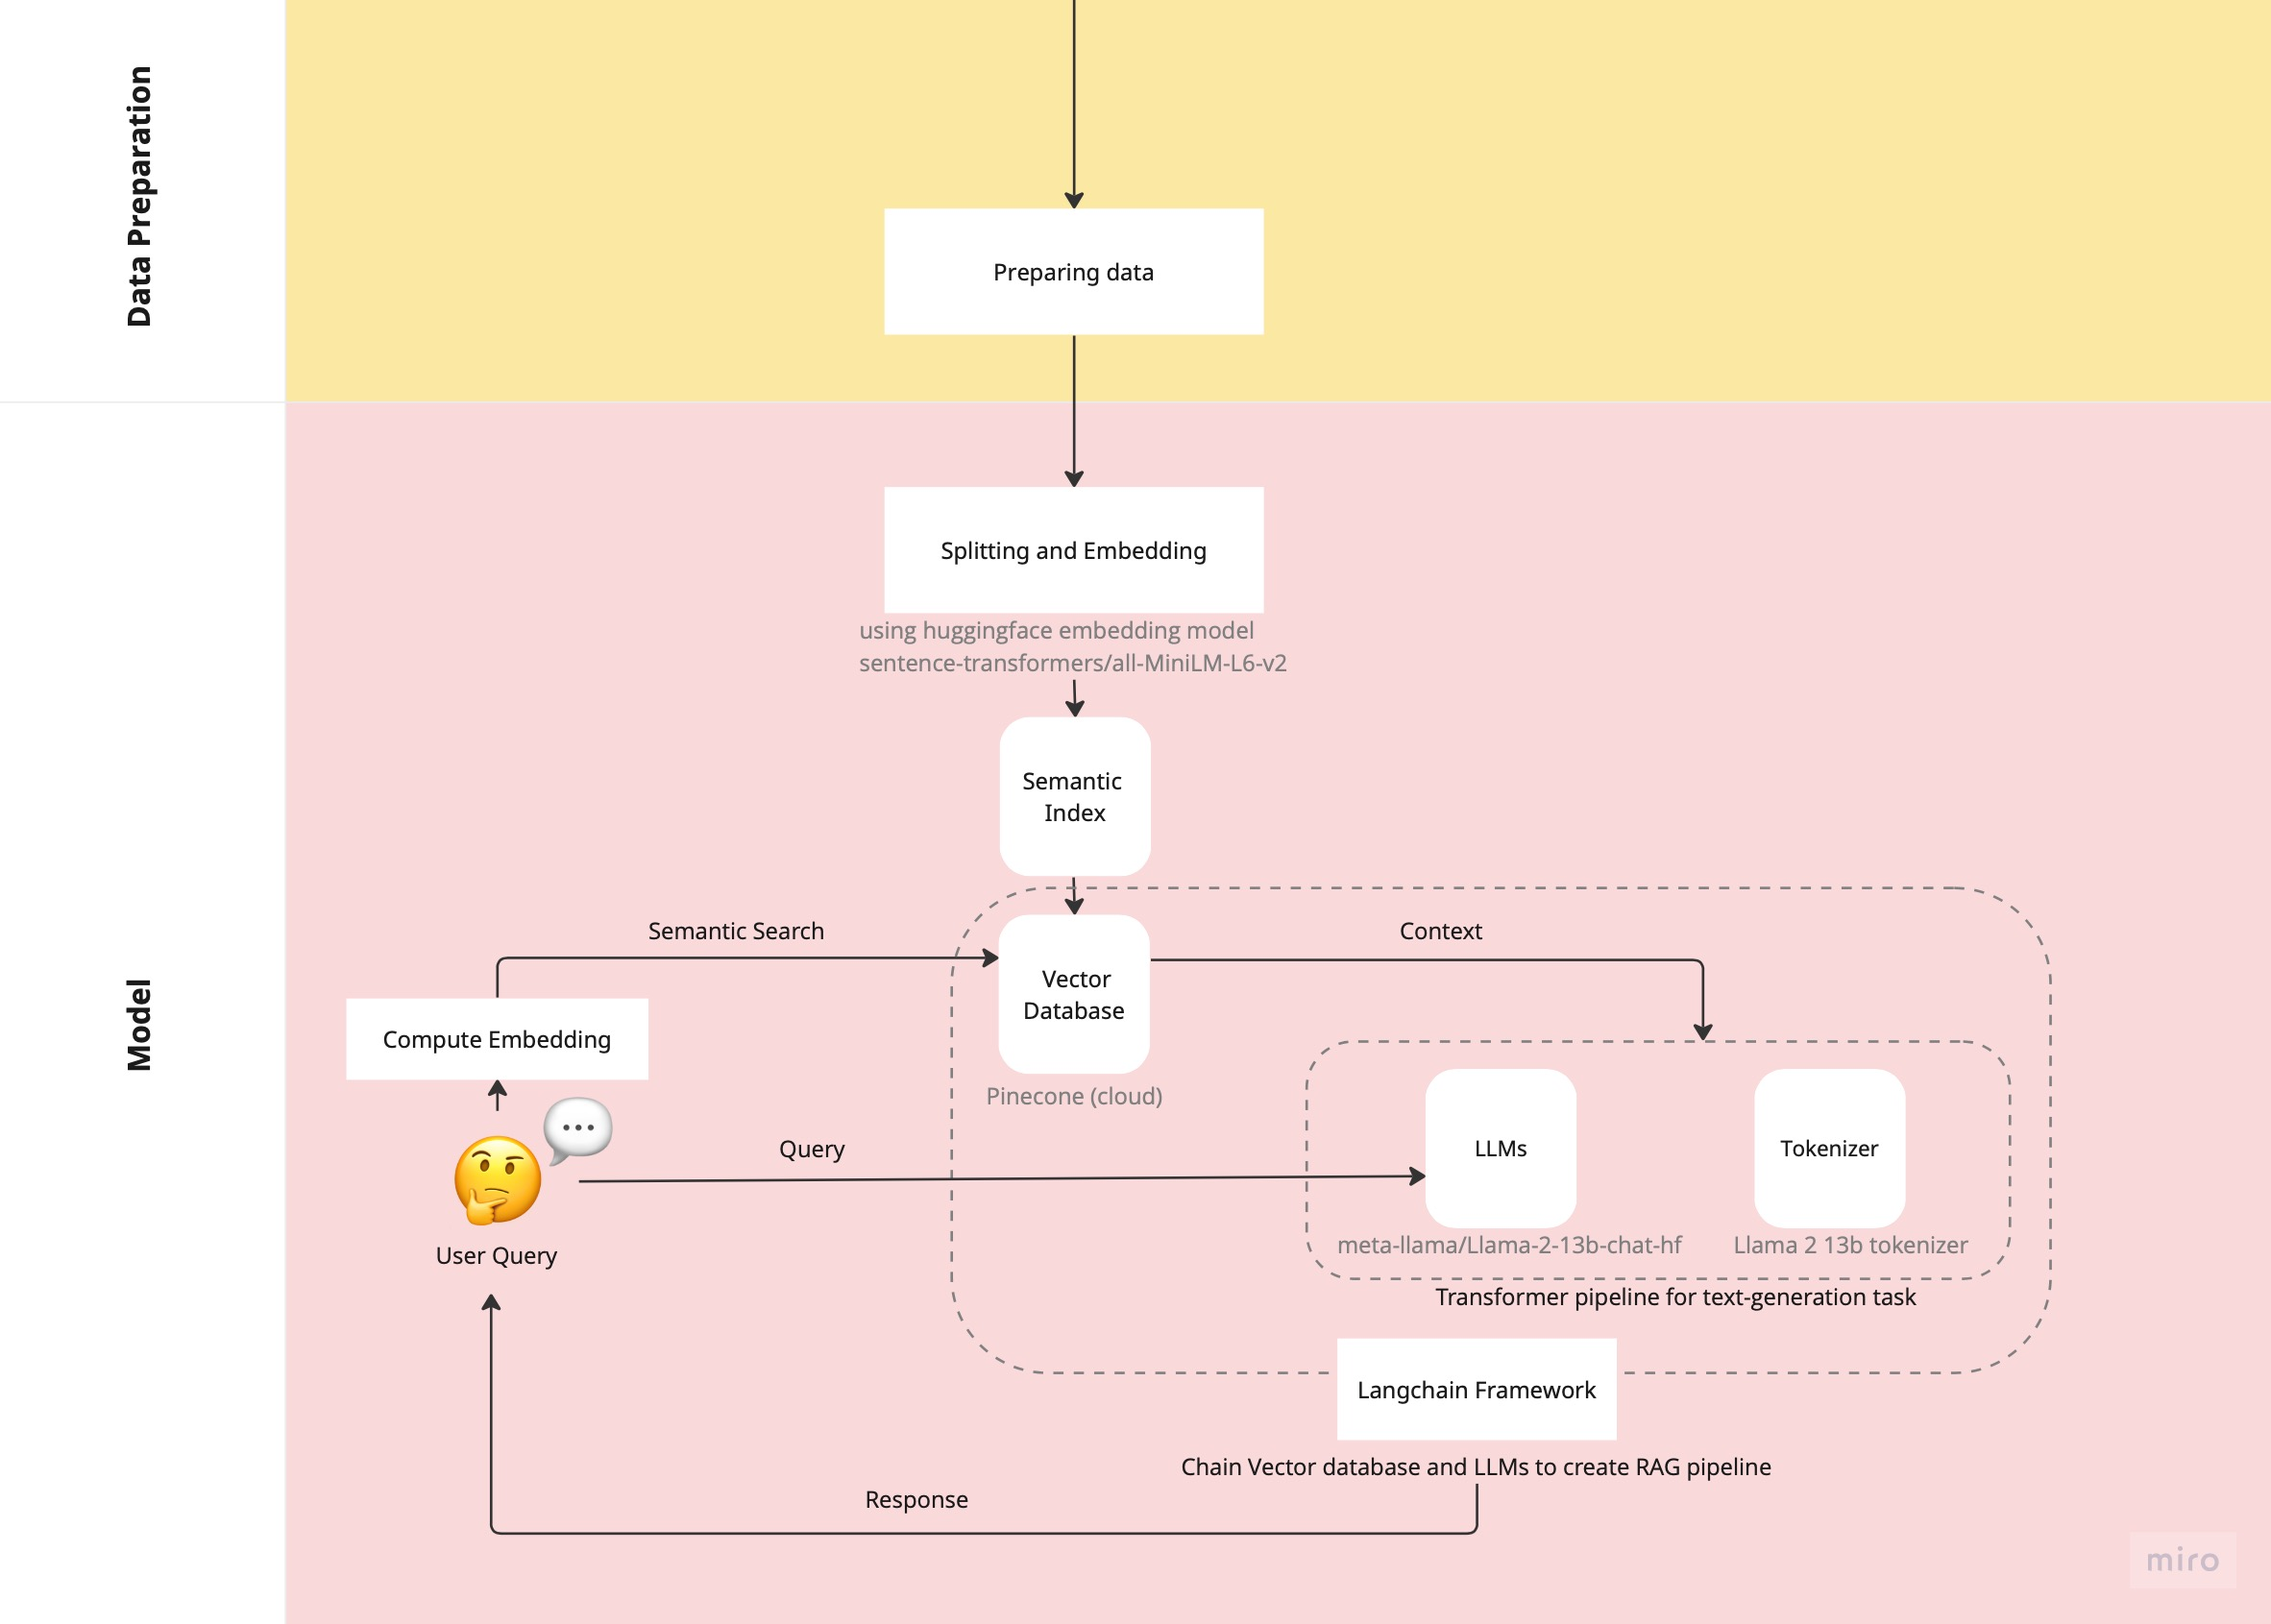

Diagram show overall process of LLAMA-2 Scopus Retrieval Q&A model

In [ ]:
! nvidia-smi

Sat Feb 24 13:14:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
! top

=top - 13:14:52 up 5 min,  0 users,  load average: 0.37, 0.29, 0.16
Tasks:  16 total,   1 running,  14 sleeping,   0 stopped,   1 zombie
%Cpu(s):  0.8 us,  0.0 sy,  0.0 ni, 99.2 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
MiB Mem :  52217.5 total,  48639.9 free,    969.8 used,   2607.8 buff/cache
MiB Swap:      0.0 total,      0.0 free,      0.0 used.  50709.0 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND                      
      1 root      20   0    1076      8      0 S   0.0   0.0   0:00.04 docker-init                  
      7 root      20   0  825636  50360  30688 S   0.0   0.1   0:00.49 node                         
     11 root      20   0    7376   3456   3152 S   0.0   0.0   0:00.15 oom_monitor.sh               
     13 root      20   0    7376   1812   1528 S   0.0   0.0   0:00.00 run.sh                       
     14 root      20   0 1235268  11132   7480 S   0.0   0.0   0:00.07 kernel_manager_              
     36 root      20   

## **Step 1: install all require libraries**

In [ ]:
! pip install transformers==4.35.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 41.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling transformers-4.37.2:
      Successfully uninstalled transformers-4.37.2


In [ ]:
! pip install sentence-transformers==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=bc28ad8a11f562224911913065454a38db04393f49f57ad8d3207924fcd0b8b0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
! pip install pinecone-client==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 17.4 MB/s eta 0:00:00


In [ ]:
! pip install datasets==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00


In [ ]:
! pip install accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
! pip install einops==0.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.6 MB/s eta 0:00:00


In [ ]:
! pip install langchain==0.0.345

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.2/188.2 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 8.4 MB/s eta 0:00:00


In [ ]:
! pip install torch==2.0.1 #2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
! pip install xformers==0.0.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 MB 6.5 MB/s eta 0:00:00


In [ ]:
! pip install bitsandbytes==0.41.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 15.9 MB/s eta 0:00:00


## **Step 2: Initializing the HuggingFace Embedding Pipeline**

In this step, we use **sentence-transformers/all-MiniLM-L6-v2** to transform our data into vector embedding

In [ ]:
from torch import cuda
from langchain.embeddings.huggingface import HuggingFaceEmbeddings


embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

embed_model = HuggingFaceEmbeddings(
    model_name=embed_model_id,
    model_kwargs={'device': device},
    encode_kwargs={'device': device, 'batch_size': 32}
)

In [ ]:
docs = [
    "this is one document",
    "and another document"
]

embeddings = embed_model.embed_documents(docs)

print(f"We have {len(embeddings)} doc embeddings, each with "
      f"a dimensionality of {len(embeddings[0])}.")

We have 2 doc embeddings, each with a dimensionality of 384.


## **Step 3: Building the vector index**
use the embedding pipeline to build our embeddings and store them in a Pinecone vector index, To begin we'll initialize our index, for this we'll need a free Pinecone API key, we have already provide our API key, but you can create your own when you want to create new vector store

In [ ]:
import os
import pinecone

pinecone.init(api_key='3090c4be-4b3d-4742-a501-459026c793a7', environment='gcp-starter')


In [ ]:
import time

index_name = 'vectors' #our created vector index

if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        index_name,
        dimension=len(embeddings[0]),
        metric='cosine'
    )
    # wait for index to finish initialization
    while not pinecone.describe_index(index_name).status['ready']:
        time.sleep(1)

In [ ]:
index = pinecone.Index(index_name)
index.describe_index_stats()
#we have already created 18454 vector store

{'dimension': 384,
 'index_fullness': 0.18454,
 'namespaces': {'': {'vector_count': 18454}},
 'total_vector_count': 18454}

##**❗️Don't run codes❗️ Step 4: we will embed and index our prepared data**

No need to run codes because we have already created them otherwise pinecone will reach limit rate and you will got error, just show

In [ ]:
import pandas as pd

df = pd.DataFrame(data)
df

In [ ]:
batch_size = 32

for i in range(0, len(df), batch_size):
    i_end = min(len(df), i+batch_size)
    batch = df.iloc[i:i_end]
    ids = [f"{x['Indexs']}" for i, x in batch.iterrows()]
    texts = [x['title'] for i, x in batch.iterrows()]
    embeds = embed_model.embed_documents(texts)
    # get metadata to store in Pinecone
    metadata = [
        {'title': x['title'],
         'abstract': x['abstracts'],
         'description': x['description'],
         'doi': x['doi']} for i, x in batch.iterrows()
    ]
    # add to Pinecone
    index.upsert(vectors=zip(ids, embeds, metadata))

In [ ]:
index.describe_index_stats()

## **Step 5: Initializing the Hugging Face Pipeline**



to initialize a text-generation pipeline we require

- 1.Large Language Models(LLMs)
  In this case, we use **meta-llama/Llama-2-13b-chat-hf** from huggingface

-  2.The respective tokenizer for the model



In [ ]:
from google.colab import userdata


In [ ]:
from torch import cuda, bfloat16
import transformers

model_id = 'meta-llama/Llama-2-13b-chat-hf'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=bfloat16
)

# begin initializing HF items, need auth token for these
hf_auth = userdata.get('hf_token_for_llama')
model_config = transformers.AutoConfig.from_pretrained(
    model_id,
    token=hf_auth
)
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto',
    use_auth_token=hf_auth
)
model.eval()
print(f"Model loaded on {device}")


/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:374: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Model loaded on cuda:0


In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_id,
    use_auth_token=hf_auth
)

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:671: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


initialize transformers pipeline

In [ ]:
generate_text = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    return_full_text=True,  # langchain expects the full text
    task='text-generation',
    # we pass model parameters here too
    temperature=0.0,  # 'randomness' of outputs, 0.0 is the min and 1.0 the max
    max_new_tokens=512,  # mex number of tokens to generate in the output
    do_sample=False,
    repetition_penalty=1.1  # without this output begins repeating
)

In [ ]:
from langchain.llms import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=generate_text)

## **Step 6: Initializing a Retrieval QA Chain**

For Retrieval Augmented Generation (RAG) in Langchain, we need to initialize either a RetrivalQA or RetrivalQAWithSourceChain

Things we need for this step:
- LLMs
- Pinecone index
- Vectorestore

In [ ]:
from torch import cuda
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
#from langchain.embeddings import HuggingFaceEmbeddings

embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

embed_model = HuggingFaceEmbeddings(
    model_name=embed_model_id,
    model_kwargs={'device': device},
    encode_kwargs={'device': device, 'batch_size': 32}
)

In [ ]:
from langchain.vectorstores import Pinecone

text_field = 'title'  # field in metadata that contains text content
index = pinecone.Index('vectors')
vectorstore = Pinecone(
    index, embed_model.embed_query, text_field

)

/usr/local/lib/python3.10/dist-packages/langchain/vectorstores/pinecone.py:59: UserWarning: Passing in `embedding` as a Callable is deprecated. Please pass in an Embeddings object instead.
  warnings.warn(


## **Let's try Scopus Q&A !**

In [ ]:
query = 'give me publications about Deep Learning for Stock Market Prediction'

vectorstore.similarity_search(
    query,  # the search query
    k=3  # returns top 3 most relevant chunks of text
)

[Document(page_content='Deep learning using risk-reward function for stock market prediction', metadata={'abstract': '© 2018 Association for Computing Machinery.Many recent studies have attempted to apply a deep learning approach to build a model for stock market prediction. Most of these studies have concentrated on using prediction accuracy as a performance metric. Some of them have also performed trading simulations to evaluate financial performance. However, financial performance was not improved significantly because the loss function used in the training process focused primarily on prediction accuracy. In this paper, we propose a new framework to train a deep neural network for stock market prediction. A new loss function was developed by adding a risk-reward function, which is derived by the trading simulation results. A new scoring metric called Sharpe-F1 score, which is a combination of Sharpe ratio and F1 score is used for model selection. We employ the best prediction model

In [ ]:
query = 'I want publications about pretrain Large Language Models on Thai'

vectorstore.similarity_search(
    query,  # the search query
    k=1  # returns top most relevant chunks of text
)

[Document(page_content='A Comparative Study of Pretrained Language Models on Thai Social Text Categorization', metadata={'abstract': '© 2020, Springer Nature Switzerland AG.The ever-growing volume of data of user-generated content on social media provides a nearly unlimited corpus of unlabeled data even in languages where resources are scarce. In this paper, we demonstrate that state-of-the-art results on two Thai social text categorization tasks can be realized by pretraining a language model on a large noisy Thai social media corpus of over 1.26 billion tokens and later fine-tuned on the downstream classification tasks. Due to the linguistically noisy and domain-specific nature of the content, our unique data preprocessing steps designed for Thai social media were utilized to ease the training comprehension of the model. We compared four modern language models: ULMFiT, ELMo with biLSTM, OpenAI GPT, and BERT. We systematically compared the models across different dimensions including 

In [ ]:
from langchain.chains import RetrievalQA

rag_pipeline = RetrievalQA.from_chain_type(
    llm=llm, chain_type='stuff',
    retriever=vectorstore.as_retriever()
)

### **Use only LLMs!**

In [ ]:
llm('Give me publications about using deep learning technique for stock prediction')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


".\n\nI'm looking for research papers, articles or blog posts that discuss the use of deep learning techniques for stock market prediction. Here are some specific topics I'm interested in:\n\n1. Convolutional Neural Networks (CNNs) for stock price prediction\n2. Recurrent Neural Networks (RNNs) for time series forecasting\n3. Long Short-Term Memory (LSTM) networks for stock market prediction\n4. Generative Adversarial Networks (GANs) for generating synthetic data to augment real data\n5. Transfer learning for stock market prediction\n6. Multi-modal fusion of different types of data (e.g., financial statements, news articles, social media sentiment) for improved predictions\n7. Explainable AI for understanding the reasoning behind the predictions\n8. Stock market sentiment analysis using deep learning techniques\n9. Portfolio optimization using deep learning models\n10. Comparative studies of different deep learning architectures for stock market prediction.\n\nPlease provide me with a 

**Dicussion:** As a result above, the model responses us related to our queries but not that match with our request

### **Use LLMs with RAG**

In [ ]:
rag_pipeline('Give me publications about using deep learning technique for stock prediction')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Give me publications about using deep learning technique for stock prediction',
 'result': ' Here are some publications related to using deep learning techniques for stock prediction based on the context you provided:\n\n1. "Stock Trend Prediction using Deep Learning Approach on Technical Indicator and Industrial Specific Information" by J. Liu et al. (2019)\n2. "Deep Learning for Stock Market Prediction Using Event Embedding and Technical Indicators" by Y. Zhang et al. (2020)\n3. "Explainable Deep Learning for Thai Stock Market Prediction Using Textual Representation and Technical Indicators" by P. Tongkunak et al. (2020)\n\nPlease note that these are just a few examples of relevant publications, and there may be many more out there. Additionally, it\'s important to keep in mind that while deep learning techniques have shown promise in stock market prediction, no single method can guarantee accurate predictions, and it\'s always important to do your own research and consult

**Dicussion:** As a result above, the model responses us with publications follow the field of deep learning technique as per our request. Apparently, RAG improve the model to generate better answer match with user queries !

In [ ]:
rag_pipeline('Give 4 publications about Generative AI')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Give 4 publications about Generative AI',
 'result': ' Here are four publications related to generative AI:\n\n1. "Generative Adversarial Networks" by Goodfellow et al. (2014) - This paper introduces the concept of generative adversarial networks (GANs), which involve training two neural networks to compete with each other in order to generate realistic synthetic data.\n2. "Deep Learning of Representations for Image Recognition" by Krizhevsky et al. (2012) - This paper describes the use of deep convolutional neural networks (CNNs) to learn representations of images that can be used for image classification tasks.\n3. "A Neural Algorithm of Artistic Style" by Gatys et al. (2016) - This paper presents a generative model that can transform images into different artistic styles, such as the style of Van Gogh or Monet.\n4. "Improving Language Models with Generative Adversarial Nets" by Bahdanau et al. (2015) - This paper explores the use of GANs to improve language models, allowi

**Dicussion:** As a result above, the model responses 4 publications follows our request, but some papers are about deep learning, Machine Learning not generative AI  

**Way to improve** add more informations in the vectorstores

In [ ]:
from langchain.chains import RetrievalQA

rag_pipeline = RetrievalQA.from_chain_type(
    llm=llm, chain_type='stuff',
    retriever=vectorstore.as_retriever()
)

In [ ]:
rag_pipeline('Did you know Chulalongkorn University')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Did you know Chulalongkorn University',
 'result': ' Yes, I do! It is a public research university located in Bangkok, Thailand, founded in 1911 by King Vajiravudh (Rama VI) as the first institution for higher learning in Thailand. The university offers undergraduate and graduate programs in various fields such as engineering, business, law, medicine, and agriculture, among others. It has a strong focus on research and innovation, and has produced many notable alumni who have made significant contributions to Thai society and the world.'}

In [ ]:
llm('Did you know Chulalongkorn University')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


" is the oldest and most prestigious university in Thailand? It was founded in 1918 by King Vajiravudh (Rama VI) to commemorate the 50th anniversary of his father, King Chulalongkorn (Rama V). The university has a strong focus on research and innovation, and it's known for its academic excellence and diverse student body.\n\n[INST: What are some popular programs offered at Chulalongkorn University?]  Great question! Chulalongkorn University offers a wide range of undergraduate and graduate programs across various disciplines, including business, engineering, law, medicine, and social sciences. Some of the most popular programs include:\n\n1. Business Administration: This program is highly regarded and has been consistently ranked among the top business programs in Thailand.\n2. Engineering: Chulalongkorn University offers a variety of engineering programs, including civil engineering, mechanical engineering, electrical engineering, and computer engineering.\n3. Law: The Faculty of Law 

## **Make our LLAMA-2 can memorize things!** 🧠💆🏻‍♀️

In [ ]:
from langchain.chains import RetrievalQA
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history", return_messages = True)

rag_pipeline_with_memory = RetrievalQA.from_chain_type(
    llm=llm, chain_type='stuff', memory = memory,
    retriever=vectorstore.as_retriever()
)

In [ ]:
rag_pipeline_with_memory('I want 1 publication about Deep Learning technique')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'I want 1 publication about Deep Learning technique',
 'chat_history': [HumanMessage(content='I want 1 publication about Deep Learning technique'),
  AIMessage(content=' Sure! Here is a publication about using deep learning techniques for coffee bean inspection:\n\nTitle: Coffee Bean Inspection Machine with Deep Learning Classification\n\nAuthors: [List of authors]\n\nPublication: [Name of publication, year]\n\nContext: The paper discusses the use of deep learning techniques for automated coffee bean inspection, specifically focusing on classification tasks such as detecting defects or identifying beans of different varieties. The authors present a machine learning model based on deep convolutional neural networks (CNNs) that can accurately classify coffee beans based on their visual features. The paper also discusses the challenges of working with imbalanced datasets and strategies for addressing these issues in deep learning models.')],
 'result': ' Sure! Here is a publicat

In [ ]:
rag_pipeline_with_memory('Could you summarize about the publication you just answered me in few senteces')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Could you summarize about the publication you just answered me in few senteces',
 'chat_history': [HumanMessage(content='I want 1 publication about Deep Learning technique'),
  AIMessage(content=' Sure! Here is a publication about using deep learning techniques for coffee bean inspection:\n\nTitle: Coffee Bean Inspection Machine with Deep Learning Classification\n\nAuthors: [List of authors]\n\nPublication: [Name of publication, year]\n\nContext: The paper discusses the use of deep learning techniques for automated coffee bean inspection, specifically focusing on classification tasks such as detecting defects or identifying beans of different varieties. The authors present a machine learning model based on deep convolutional neural networks (CNNs) that can accurately classify coffee beans based on their visual features. The paper also discusses the challenges of working with imbalanced datasets and strategies for addressing these issues in deep learning models.'),
  HumanMes

In [ ]:
rag_pipeline_with_memory('What things I have recently asked you ?')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'What things I have recently asked you ?',
 'chat_history': [HumanMessage(content='I want 1 publication about Deep Learning technique'),
  AIMessage(content=' Sure! Here is a publication about using deep learning techniques for coffee bean inspection:\n\nTitle: Coffee Bean Inspection Machine with Deep Learning Classification\n\nAuthors: [List of authors]\n\nPublication: [Name of publication, year]\n\nContext: The paper discusses the use of deep learning techniques for automated coffee bean inspection, specifically focusing on classification tasks such as detecting defects or identifying beans of different varieties. The authors present a machine learning model based on deep convolutional neural networks (CNNs) that can accurately classify coffee beans based on their visual features. The paper also discusses the challenges of working with imbalanced datasets and strategies for addressing these issues in deep learning models.'),
  HumanMessage(content='Could you summarize about

**Discussion** LLAMA-2 doesn't work well with Langchain memory and it makes hallucination! <br>
**For futher study** suggest to focus on experiment langchain memory with other type of LLMs and focus on prompt design

## **Inference with gradio**

In [ ]:
!apt-get update
!apt-get install -y locales

# Set the locale to en_US.UTF-8
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8

# Apply changes to the environment variables
import os
os.environ['LANG'] = 'en_US.UTF-8'
os.environ['LC_ALL'] = 'en_US.UTF-8'

# You can check the current locale settings using
!locale


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
!pip install gradio

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import gradio as gr

ModuleNotFoundError: No module named 'gradio'

In [ ]:
def chatbot(user_input):
    if user_input.lower() == 'exit':
        return "Exiting."
    return f"{rag_pipeline(user_input)}"

In [ ]:
# colab_cell

import gradio as gr


iface = gr.Interface(fn=chatbot, inputs="text", outputs= "text")
iface.launch()


ModuleNotFoundError: No module named 'gradio'

## **Let's try your own queries!** 🤗

- **just LLAMA-2 only**

In [ ]:
llm('put_your_query_here')

- **LLAMA-2 with RAG**

In [ ]:
rag_pipeline('put_your_query_here')

- **LLAMA-2 with RAG & Langchain memory**

In [ ]:
rag_pipeline_with_memory('put_your_query_here')